In [88]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpre
import sklearn.model_selection as skmod
import sklearn.linear_model as sklin
import matplotlib.pyplot as plt
import seaborn as sb
import scipy  as sp
plt.rcParams["font.family"]="BM YEONSUNG"
D=pd.read_excel("https://data.hossam.kr/F02/fish2.xlsx")

In [89]:
data=pd.DataFrame(D)

In [90]:
target="무게"
feature=data.columns.difference(["무게"])


<Figure size 1200x800 with 0 Axes>

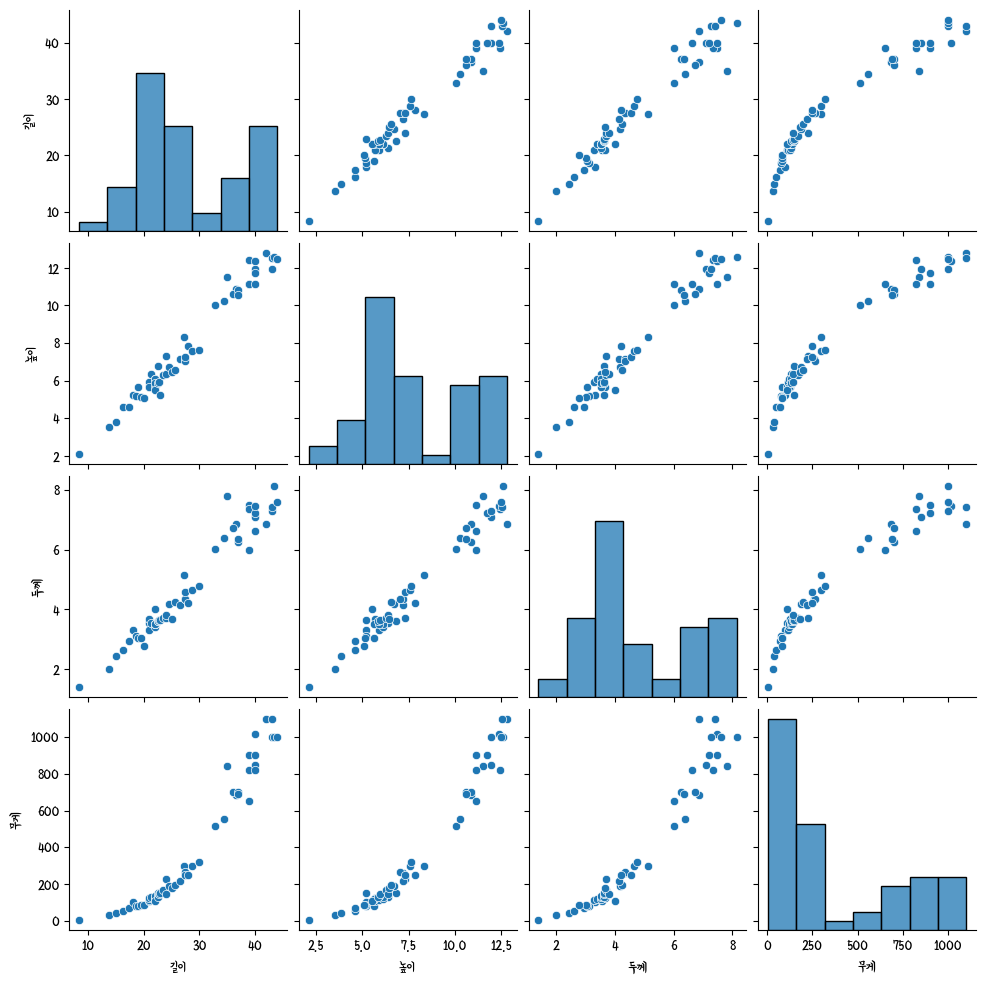

In [91]:
plt.figure(figsize=(12,8))
sb.pairplot(data)

시각화 결과 2차식~3차식을 기대할 수 있음

## feature 살펴보기

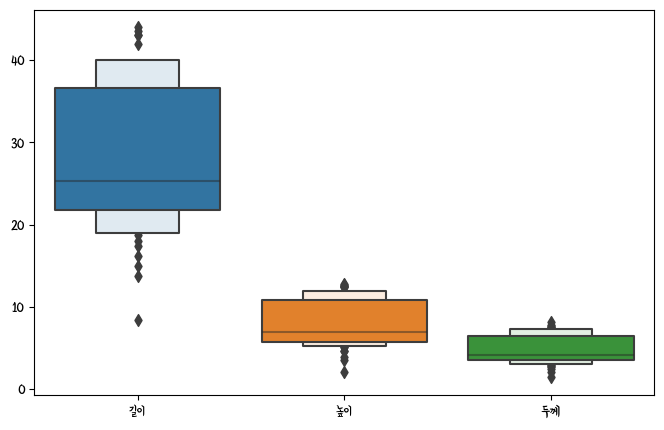

In [92]:
plt.figure(figsize=(8,5))
sb.boxenplot(data[feature])
plt.show()

## VIF 검사

In [93]:
import statsmodels.api as sm

In [94]:
vif_set=[]
for x in feature:
    sub_set={}
    fit=sm.OLS(endog=data[x],exog=sm.add_constant(data[[col for col in feature if col!=x]])).fit()
    sub_set["feature"]=x
    sub_set["vif"]=1/(1-fit.rsquared)
    vif_set.append(sub_set)

In [95]:
pd.DataFrame(vif_set)

,feature,vif
0,길이,36.307006
1,높이,53.581546
2,두께,30.473278


따라서 높이를 제거하고 다시 vif 검사를 실시

In [96]:
vif_set=[]
for x in feature:
    if x=='높이':
        continue
    sub_set={}
    fit=sm.OLS(endog=data[x],exog=sm.add_constant(data[[col for col in feature if col not in ["높이",x]]])).fit()
    sub_set["feature"]=x
    sub_set["vif"]=1/(1-fit.rsquared)
    vif_set.append(sub_set)

In [97]:
pd.DataFrame(vif_set)

,feature,vif
0,길이,19.917765
1,두께,19.917765


결론 : 하나의 변수만 사용하는게 맞을 듯

## 회귀분석

#### 참고용 모듈 소개

In [98]:
poly=skpre.PolynomialFeatures(degree=2,include_bias=False)
fit=poly.fit_transform(data[feature])
poly_df=pd.DataFrame(fit,columns=poly.get_feature_names_out())

In [99]:
poly_df.head(2)

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000


## Regression

In [115]:
model=sklin.LinearRegression()
fit1=model.fit(X=poly_df[["길이","길이^2"]].squeeze(),y=data[target])
model2=sklin.LinearRegression()
fit2=model2.fit(X=poly_df[["두께","두께^2"]].squeeze(),y=data[target])
model3=sklin.LinearRegression()
fit3=model3.fit(X=poly_df[["높이","높이^2"]].squeeze(),y=data[target])

<Axes: xlabel='높이', ylabel='무게'>

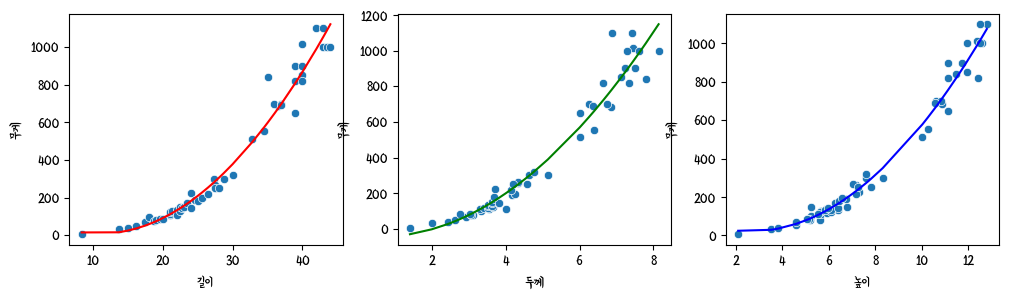

In [122]:
_,a=plt.subplots(1,3,figsize=(12,3))
sb.scatterplot(x=data["길이"],y=data[target],ax=a[0])
sb.scatterplot(x=data["두께"],y=data[target],ax=a[1])
sb.scatterplot(x=data["높이"],y=data[target],ax=a[2])
sb.lineplot(x=data["길이"],y=fit1.predict(poly_df[["길이","길이^2"]]).squeeze(),color="red",ax=a[0])
sb.lineplot(x=data["두께"],y=fit2.predict(poly_df[["두께","두께^2"]]).squeeze(),color="green",ax=a[1])
sb.lineplot(x=data["높이"],y=fit3.predict(poly_df[["높이","높이^2"]]).squeeze(),color="blue",ax=a[2])

### 검증(테스트용 데이터는 너무 부족해서)

In [121]:
print("길이model :",fit1.score(poly_df[["길이","길이^2"]],data[target]))
print("두께model :",fit2.score(poly_df[["두께","두께^2"]],data[target]))
print("높이model :",fit3.score(poly_df[["높이","높이^2"]],data[target]))

길이model : 0.9726170548615385
두께model : 0.9543511219548345
높이model : 0.9813781746715239
